회귀직선
==
붓꽃 데이터 , 
--
- 꽃받침(sepal) 길이를 보고 꽃잎(petal) 길이를 예측

성별에 따른 몸무게 예측
--
- 키로부터 몸무게 예측

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/swkim01/DSAC3/blob/main/gg-30-회귀직선.ipynb"><img src="https://github.com/swkim01/DSAC3/raw/main/colab_logo_32px.png" />구글 코랩에서 실행</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/swkim01/DSAC3/blob/main/gg-30-회귀직선.ipynb"><img src="https://github.com/swkim01/DSAC3/raw/main/GitHub-Mark-32px.png" />깃헙에서 소스 보기</a>
  </td>
</table>


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split


In [ ]:
from sklearn import datasets 
iris = datasets.load_iris() 
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [ ]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
X_all = iris.data 
X_all[:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [ ]:
X = X_all[:, 0] 
y = X_all[:, 2]
print(X[0:3])
print(y[0:3])

[5.1 4.9 4.7]
[1.4 1.4 1.3]


Text(0, 0.5, 'Petal length')

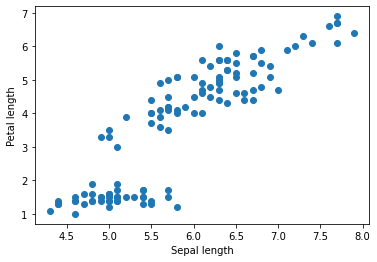

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X_train, y_train, marker='o') 
plt.xlabel("Sepal length") 
plt.ylabel("Petal length")

In [ ]:
from sklearn.linear_model import LinearRegression 
linr = LinearRegression()
linr.fit(X_train.reshape(-1,1), y_train)
print("Score : {:.3f}".format(linr.score(X_test.reshape(-1,1), y_test)))


Score : 0.655


In [ ]:
print(linr.coef_) 
print(linr.intercept_)

[1.8699969]
-7.233315234253802


- "k-" : color - marker - line style

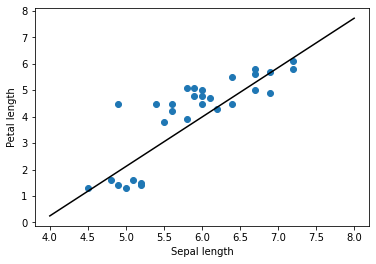

In [ ]:
plt.scatter(X_test, y_test, marker='o') 
plt.xlabel("Sepal length")
plt.ylabel("Petal length")

XX = np.linspace(4, 8, 3)
plt.plot(XX, linr.coef_ * XX + linr.intercept_, "k-")

## 몸무게 예측
- 키로부터 몸무게 예측

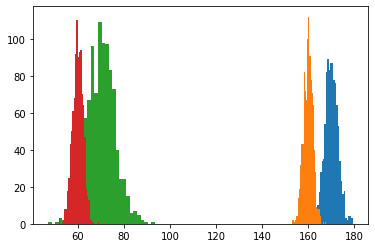

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split

n_samples = 1000
x1 = 3*np.random.randn(n_samples) + 170
x2 = 2*np.random.randn(n_samples) + 160

y1 = 2*x1 - 270 + 2*np.random.randn(n_samples) # 평균 70kg
y2 = 1*x2 - 100 + np.random.randn(n_samples) # 평균 60kg
plt.hist(x1, bins=30)
plt.hist(x2, bins=30)

plt.hist(y1, bins=30)
plt.hist(y2, bins=30)
plt.show()

### 남자 데이터에 대해서만

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2)
leg1 = LinearRegression()
leg1.fit(X_train.reshape(-1,1), y_train)

print(leg1.coef_)
print(leg1.intercept_)
print(leg1.score(X_test.reshape(-1,1), y_test))

[2.00742473]
0.9065901151588013


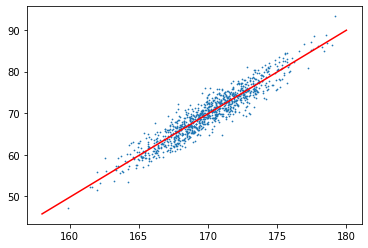

In [ ]:
xs = np.linspace(158,180,3)
ys = xs * leg1.coef_[0] + leg1.intercept_
plt.scatter(x1, y1, s=0.5)
plt.plot(xs, ys, c='r')

### 여자 데이터에 대해서만

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size=0.2)
leg1 = LinearRegression()
leg1.fit(X_train.reshape(-1,1), y_train)

print(leg1.coef_)
print(leg1.intercept_)
print(leg1.score(X_test.reshape(-1,1), y_test))

[1.02264919]
-103.60051093191278
0.8205137664199682


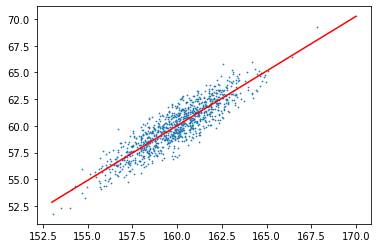

In [ ]:
xs = np.linspace(153,170,3)
ys = xs * leg1.coef_[0] + leg1.intercept_
plt.scatter(x2, y2, s=0.5)
plt.plot(xs, ys, c='r')

### 남자, 여자 데이터를 합하여

In [ ]:
x = np.concatenate((x1, x2))
y = np.concatenate((y1, y2))

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
leg1 = LinearRegression()
leg1.fit(X_train.reshape(-1,1), y_train)

print(leg1.coef_)
print(leg1.intercept_)
print(leg1.score(X_test.reshape(-1,1), y_test))

[1.11684343]
-119.37477594713503
0.8692236828030244


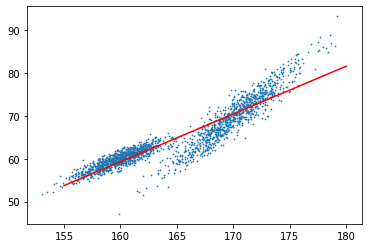

In [ ]:
xs = np.linspace(155,180,3)
ys = xs * leg1.coef_[0] + leg1.intercept_
plt.scatter(x,y, s=0.5)
plt.plot(xs, ys, c='r')

## 성별 컬럼을 추가
- y = a*x_1 + b*x_2 + c

In [ ]:
X1 = pd.DataFrame({'height':x1, 'sex':0})
X2 = pd.DataFrame({'height':x2, 'sex':1})
X = pd.concat([X1, X2], ignore_index=True)
X

,height,sex
0,169.473701,0
1,166.331673,0
2,169.746992,0
3,168.883449,0
4,167.270242,0
...,...,...
1995,157.528033,1
1996,160.411054,1
1997,160.484986,1
1998,161.361514,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
leg = LinearRegression()
leg.fit(X_train, y_train)

print(leg.coef_)
print(leg.intercept_)
print(leg.score(X_test, y_test))

[1.68654807 7.03954959]
-216.84054252807903
0.9160654367477548


In [ ]:
X_train[:10]

,height,sex
1115,161.353983,1
670,165.201379,0
810,171.970361,0
230,169.790417,0
1299,156.085433,1
981,167.897379,0
423,164.662866,0
1737,160.933566,1
502,171.114617,0
954,168.870367,0


- 위의 결과 : coef_[0] \* 키 + coef_[1] \* 성별 + intercept_
- 정확도가 높아졌다

## 교재 p.241 ---- 여기 까지

## 교차검증

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
X.shape[1]

2

In [ ]:
#cross_val = KFold(X.shape[0], 10, shuffle=True)
cross_val = KFold(10, shuffle=True)
print(cross_val_score(leg, X, y, cv=cross_val))

[0.93767677 0.91213215 0.91941283 0.91409021 0.89451991 0.91691724
 0.912416   0.89710505 0.89837187 0.91942369]


## 결정트리를 이용한 회귀 (뒤에서 설명함)

In [ ]:
from sklearn.tree import DecisionTreeRegressor 
dec_reg = DecisionTreeRegressor()
dec_reg.fit(X_train, y_train) 
print(dec_reg.score(X_test, y_test))

0.9102753242420856
